In [1]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/INEC_ESI/INEC_ESI/Metadatos_ESI_2022/esi_2022.csv", sep=';')
df_canton = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/canton.xlsx")
df_provincia = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/provincia.xlsx")
df_lugar = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/lugar_proc.xlsx")
df_jefaturas= pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/jefaturas.xlsx")
df_ocu = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/ocu.xlsx")
df_pais_c = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/pais_c.xlsx")
df_pais_c1 = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/pais_c1.xlsx")
df_pais_c2= pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/pais_c2.xlsx")

**Lista de las variables que predominan**

**Se elimina variables inecesarias**

In [4]:
df = df.drop(columns=['cont_prod', 'subcont_prod', 'cont_res', 'subcont_res', 'cont_nac', 'subcont_nac', 'cla_migr'])

In [5]:
df = df.iloc[:, 1:]
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,lug_prod,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad
0,2,1,2022,4,20,2,218,1,5,32,32017,32,1,17,1701,66666,23
1,1,1,2022,5,26,2,218,1,5,756,756006,218,1,17,1701,55555,68
2,2,1,2022,12,8,1,218,2,5,170,170010,218,11,4,401,88888,14
3,2,1,2022,10,3,1,218,1,1,840,840095,218,12,9,901,4419,71
4,1,1,2022,2,1,2,218,1,5,724,724045,724,1,17,1701,9112,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,724013,840,12,9,901,77777,61
5052629,2,2,2022,5,14,1,840,1,5,840,840221,840,12,9,901,4419,43
5052630,2,2,2022,3,7,2,840,1,5,840,840095,840,12,9,901,5111,32
5052631,2,1,2022,12,27,2,218,1,3,604,604019,218,12,9,901,3413,56


**Lista de las variables que predominan**

**Se asigna significado a los valores de la variable "tip_movi": tipo de movimiento**

In [6]:
data = {
    'tip_movi': ['1', '2'],
    'tip_mov1': ["entradas", "salidas"],
}

df_tip_movi = pd.DataFrame(data)
df_tip_movi['tip_movi'] = df_tip_movi['tip_movi'].astype(int)
result = pd.merge(df, df_tip_movi, how="left", on=["tip_movi"])
result

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,lug_prod,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1
0,2,1,2022,4,20,2,218,1,5,32,32017,32,1,17,1701,66666,23,salidas
1,1,1,2022,5,26,2,218,1,5,756,756006,218,1,17,1701,55555,68,entradas
2,2,1,2022,12,8,1,218,2,5,170,170010,218,11,4,401,88888,14,salidas
3,2,1,2022,10,3,1,218,1,1,840,840095,218,12,9,901,4419,71,salidas
4,1,1,2022,2,1,2,218,1,5,724,724045,724,1,17,1701,9112,38,entradas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,724013,840,12,9,901,77777,61,salidas
5052629,2,2,2022,5,14,1,840,1,5,840,840221,840,12,9,901,4419,43,salidas
5052630,2,2,2022,3,7,2,840,1,5,840,840095,840,12,9,901,5111,32,salidas
5052631,2,1,2022,12,27,2,218,1,3,604,604019,218,12,9,901,3413,56,salidas


**Se asigna significado a los valores de la variable "tip_naci": tipo de nacionalidad**

In [7]:
data = {
    'tip_naci': ['1', '2'],
    'tip_naci1': ["ecuatorianos", "extranjeros"],
}

df_tip_naci = pd.DataFrame(data)
df_tip_naci['tip_naci'] = df_tip_naci['tip_naci'].astype(int)
result1 = pd.merge(result, df_tip_naci, how="left", on=["tip_naci"])
result1["contador"]= 1
result1

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,lug_prod,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador
0,2,1,2022,4,20,2,218,1,5,32,32017,32,1,17,1701,66666,23,salidas,ecuatorianos,1
1,1,1,2022,5,26,2,218,1,5,756,756006,218,1,17,1701,55555,68,entradas,ecuatorianos,1
2,2,1,2022,12,8,1,218,2,5,170,170010,218,11,4,401,88888,14,salidas,ecuatorianos,1
3,2,1,2022,10,3,1,218,1,1,840,840095,218,12,9,901,4419,71,salidas,ecuatorianos,1
4,1,1,2022,2,1,2,218,1,5,724,724045,724,1,17,1701,9112,38,entradas,ecuatorianos,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,724013,840,12,9,901,77777,61,salidas,extranjeros,1
5052629,2,2,2022,5,14,1,840,1,5,840,840221,840,12,9,901,4419,43,salidas,extranjeros,1
5052630,2,2,2022,3,7,2,840,1,5,840,840095,840,12,9,901,5111,32,salidas,extranjeros,1
5052631,2,1,2022,12,27,2,218,1,3,604,604019,218,12,9,901,3413,56,salidas,ecuatorianos,1


**Entrada y salida de Ecuatorianos y Extranjeros**

In [8]:
result2 = result1.groupby(["tip_mov1", "tip_naci1"])["contador"].sum().reset_index()
result2

,tip_mov1,tip_naci1,contador
0,entradas,ecuatorianos,1243713
1,entradas,extranjeros,1213831
2,salidas,ecuatorianos,1357644
3,salidas,extranjeros,1237445


**Se asigna significado a los valores de la variable "sex_migr": sexo**

In [9]:
data = {
    'sex_migr': ['1', '2', '3'],
    'sex_migr1': ["hombres", "mujeres", "indefinido"],
}

df_sex_migr = pd.DataFrame(data)
df_sex_migr['sex_migr'] = df_sex_migr['sex_migr'].astype(int)
result3 = pd.merge(result1, df_sex_migr, how="left", on=["sex_migr"])
result3


,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,32,1,17,1701,66666,23,salidas,ecuatorianos,1,mujeres
1,1,1,2022,5,26,2,218,1,5,756,...,218,1,17,1701,55555,68,entradas,ecuatorianos,1,mujeres
2,2,1,2022,12,8,1,218,2,5,170,...,218,11,4,401,88888,14,salidas,ecuatorianos,1,hombres
3,2,1,2022,10,3,1,218,1,1,840,...,218,12,9,901,4419,71,salidas,ecuatorianos,1,hombres
4,1,1,2022,2,1,2,218,1,5,724,...,724,1,17,1701,9112,38,entradas,ecuatorianos,1,mujeres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,840,12,9,901,77777,61,salidas,extranjeros,1,hombres
5052629,2,2,2022,5,14,1,840,1,5,840,...,840,12,9,901,4419,43,salidas,extranjeros,1,hombres
5052630,2,2,2022,3,7,2,840,1,5,840,...,840,12,9,901,5111,32,salidas,extranjeros,1,mujeres
5052631,2,1,2022,12,27,2,218,1,3,604,...,218,12,9,901,3413,56,salidas,ecuatorianos,1,mujeres


**Se asigna significado a los valores de la variable "nac_migr": nacionalidad**

In [10]:
df_nac_migr = pd.DataFrame(df_pais_c)
df_nac_migr['nac_migr'] = df_nac_migr['nac_migr'].astype(int)
result4 = pd.merge(result3, df_nac_migr, how="left", on=["nac_migr"])
result4

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,1,17,1701,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador
1,1,1,2022,5,26,2,218,1,5,756,...,1,17,1701,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador
2,2,1,2022,12,8,1,218,2,5,170,...,11,4,401,88888,14,salidas,ecuatorianos,1,hombres,Ecuador
3,2,1,2022,10,3,1,218,1,1,840,...,12,9,901,4419,71,salidas,ecuatorianos,1,hombres,Ecuador
4,1,1,2022,2,1,2,218,1,5,724,...,1,17,1701,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,12,9,901,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América
5052629,2,2,2022,5,14,1,840,1,5,840,...,12,9,901,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América
5052630,2,2,2022,3,7,2,840,1,5,840,...,12,9,901,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América
5052631,2,1,2022,12,27,2,218,1,3,604,...,12,9,901,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador


**Se asigna significado a los valores de la variable "via_tran": medio de transporte**

In [11]:
data = {
    'via_tran': ['1', '2', '3', '4'],
    'via_tran1': ["Vía Aérea", "Vía Terrestre", "Vía Marítima","Vía Fluvial" ],
}

df_via_tran = pd.DataFrame(data)
df_via_tran['via_tran'] = df_via_tran['via_tran'].astype(int)
result5 = pd.merge(result4, df_via_tran, how="left", on=["via_tran"])
result5

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1
0,2,1,2022,4,20,2,218,1,5,32,...,17,1701,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea
1,1,1,2022,5,26,2,218,1,5,756,...,17,1701,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea
2,2,1,2022,12,8,1,218,2,5,170,...,4,401,88888,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre
3,2,1,2022,10,3,1,218,1,1,840,...,9,901,4419,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea
4,1,1,2022,2,1,2,218,1,5,724,...,17,1701,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,9,901,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea
5052629,2,2,2022,5,14,1,840,1,5,840,...,9,901,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea
5052630,2,2,2022,3,7,2,840,1,5,840,...,9,901,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea
5052631,2,1,2022,12,27,2,218,1,3,604,...,9,901,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea


**Se asigna significado a los valores de la variable "mot_viam": motivo de viaje**

In [12]:
data = {
    'mot_viam': ['1', '2', '3', '4', '5', '6', '7', '9' ],
    'mot_viam1': ["Turismo", "Negocios", "Eventos","Estudios", "Residencia", "Transeúnte", "Tripulación", "otros" ],
}

df_mot_viam1 = pd.DataFrame(data)
df_mot_viam1['mot_viam'] = df_mot_viam1['mot_viam'].astype(int)
result6 = pd.merge(result5, df_mot_viam1, how="left", on=["mot_viam"])
result6

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1
0,2,1,2022,4,20,2,218,1,5,32,...,1701,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia
1,1,1,2022,5,26,2,218,1,5,756,...,1701,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia
2,2,1,2022,12,8,1,218,2,5,170,...,401,88888,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia
3,2,1,2022,10,3,1,218,1,1,840,...,901,4419,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo
4,1,1,2022,2,1,2,218,1,5,724,...,1701,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,901,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia
5052629,2,2,2022,5,14,1,840,1,5,840,...,901,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia
5052630,2,2,2022,3,7,2,840,1,5,840,...,901,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia
5052631,2,1,2022,12,27,2,218,1,3,604,...,901,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos


**Se asigna significado a los valores de la variable "pais_prod": pais de procedencia destino**

In [13]:
df_paisprod = pd.DataFrame(df_pais_c1)
df_paisprod['pais_prod'] = df_paisprod['pais_prod'].astype(int)
paisprod_res = pd.merge(result6, df_paisprod, how="left", on=["pais_prod"])
paisprod_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,pais_prod1
0,2,1,2022,4,20,2,218,1,5,32,...,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Argentina
1,1,1,2022,5,26,2,218,1,5,756,...,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Suiza
2,2,1,2022,12,8,1,218,2,5,170,...,88888,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,Colombia
3,2,1,2022,10,3,1,218,1,1,840,...,4419,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,Estados Unidos de América
4,1,1,2022,2,1,2,218,1,5,724,...,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,España
5052629,2,2,2022,5,14,1,840,1,5,840,...,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América
5052630,2,2,2022,3,7,2,840,1,5,840,...,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América
5052631,2,1,2022,12,27,2,218,1,3,604,...,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,Perú


**Se asigna significado a los valores de la variable "pais_res": pais de residencia**

In [14]:
df_paisres = pd.DataFrame(df_pais_c2)
df_paisres['pais_res'] = df_paisres['pais_res'].astype(int)
paisres_res = pd.merge(paisprod_res, df_paisres, how="left", on=["pais_res"])
paisres_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,pais_prod1,pais_res1
0,2,1,2022,4,20,2,218,1,5,32,...,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Argentina,Argentina
1,1,1,2022,5,26,2,218,1,5,756,...,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Suiza,Ecuador
2,2,1,2022,12,8,1,218,2,5,170,...,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,Colombia,Ecuador
3,2,1,2022,10,3,1,218,1,1,840,...,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,Estados Unidos de América,Ecuador
4,1,1,2022,2,1,2,218,1,5,724,...,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,España,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,España,Estados Unidos de América
5052629,2,2,2022,5,14,1,840,1,5,840,...,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América
5052630,2,2,2022,3,7,2,840,1,5,840,...,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América
5052631,2,1,2022,12,27,2,218,1,3,604,...,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,Perú,Ecuador


**Se asigna significado a los valores de la variable "jef_migr": jefatura de migración**

In [15]:
df_ubijeft = pd.DataFrame(df_jefaturas)
df_ubijeft['jef_migr'] = df_ubijeft['jef_migr'].astype(int)
cant_res= pd.merge(paisres_res, df_ubijeft, how="left", on=["jef_migr"])
cant_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,pais_prod1,pais_res1,jef_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre
1,1,1,2022,5,26,2,218,1,5,756,...,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre
2,2,1,2022,12,8,1,218,2,5,170,...,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca
3,2,1,2022,10,3,1,218,1,1,840,...,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo
4,1,1,2022,2,1,2,218,1,5,724,...,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,España,España,Aeropuerto Internacional Mariscal Sucre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo
5052629,2,2,2022,5,14,1,840,1,5,840,...,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo
5052630,2,2,2022,3,7,2,840,1,5,840,...,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo
5052631,2,1,2022,12,27,2,218,1,3,604,...,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo


**Elimina valores duplicados de la varible "pro_jefm" de "df_provincia"**

In [16]:
df_prov_cls = df_provincia.drop_duplicates(subset=['pro_jefm'])
df_prov_cls

,pro_jefm,pro_jefm1
0,1,AZUAY
75,2,BOLIVAR
101,3,CAÑAR
134,4,CARCHI
166,5,COTOPAXI
206,6,CHIMBORAZO
261,7,EL ORO
324,8,ESMERALDAS
388,9,GUAYAS
442,10,IMBABURA


**Se asigna significado a los valores de la variable "pro_jefm": provincia jefatura de migración**

In [17]:
df_ubiprov = pd.DataFrame(df_prov_cls)
df_ubiprov['pro_jefm'] = df_ubiprov['pro_jefm'].astype(int)
prov = pd.merge(cant_res, df_ubiprov, how="left", on=["pro_jefm"])
prov

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,pais_prod1,pais_res1,jef_migr1,pro_jefm1
0,2,1,2022,4,20,2,218,1,5,32,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA
1,1,1,2022,5,26,2,218,1,5,756,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA
2,2,1,2022,12,8,1,218,2,5,170,...,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI
3,2,1,2022,10,3,1,218,1,1,840,...,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
4,1,1,2022,2,1,2,218,1,5,724,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
5052629,2,2,2022,5,14,1,840,1,5,840,...,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
5052630,2,2,2022,3,7,2,840,1,5,840,...,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
5052631,2,1,2022,12,27,2,218,1,3,604,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS


**Se asigna significado a los valores de la variable "can_jefm": canton jefatura de migración**

In [18]:
df_ubicant = pd.DataFrame(df_canton)
df_ubicant['can_jefm'] = df_ubicant['can_jefm'].astype(int)
cant_res= pd.merge(prov, df_ubicant, how="left", on=["can_jefm"])
cant_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,pais_prod1,pais_res1,jef_migr1,pro_jefm1,can_jefm1
0,2,1,2022,4,20,2,218,1,5,32,...,1,mujeres,Ecuador,Vía Aérea,Residencia,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito
1,1,1,2022,5,26,2,218,1,5,756,...,1,mujeres,Ecuador,Vía Aérea,Residencia,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito
2,2,1,2022,12,8,1,218,2,5,170,...,1,hombres,Ecuador,Vía Terrestre,Residencia,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI,Tulcán
3,2,1,2022,10,3,1,218,1,1,840,...,1,hombres,Ecuador,Vía Aérea,Turismo,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
4,1,1,2022,2,1,2,218,1,5,724,...,1,mujeres,Ecuador,Vía Aérea,Residencia,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
5052629,2,2,2022,5,14,1,840,1,5,840,...,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
5052630,2,2,2022,3,7,2,840,1,5,840,...,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
5052631,2,1,2022,12,27,2,218,1,3,604,...,1,mujeres,Ecuador,Vía Aérea,Eventos,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil


**Se asigna significado a los valores de la variable "ocu_migr": ocupación**

In [19]:
df_ocup = pd.DataFrame(df_ocu)
df_ocup['ocu_migr'] = df_ocup['ocu_migr'].astype(int)
ocu_res = pd.merge(cant_res, df_ocup, how="left", on=["ocu_migr"])
ocu_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,sex_migr1,nac_migr1,via_tran1,mot_viam1,pais_prod1,pais_res1,jef_migr1,pro_jefm1,can_jefm1,ocu_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,mujeres,Ecuador,Vía Aérea,Residencia,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN
1,1,1,2022,5,26,2,218,1,5,756,...,mujeres,Ecuador,Vía Aérea,Residencia,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN
2,2,1,2022,12,8,1,218,2,5,170,...,hombres,Ecuador,Vía Terrestre,Residencia,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI,Tulcán,NaN
3,2,1,2022,10,3,1,218,1,1,840,...,hombres,Ecuador,Vía Aérea,Turismo,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...
4,1,1,2022,2,1,2,218,1,5,724,...,mujeres,Ecuador,Vía Aérea,Residencia,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,"Limpiadores y asistentes de oficinas, hoteles ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,hombres,Estados Unidos de América,Vía Aérea,Residencia,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,NaN
5052629,2,2,2022,5,14,1,840,1,5,840,...,hombres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...
5052630,2,2,2022,3,7,2,840,1,5,840,...,mujeres,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares de servicios de abordo
5052631,2,1,2022,12,27,2,218,1,3,604,...,mujeres,Ecuador,Vía Aérea,Eventos,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares laicos de las religiones


**Se asigna significado a los valores de la variable "lug_prod": lugar de procedencia destino**

In [20]:
df_ubilugar = pd.DataFrame(df_lugar)
df_ubilugar['lug_prod'] = df_ubilugar['lug_prod'].astype(int)
lug_proc = pd.merge(ocu_res, df_ubilugar, how="left", on=["lug_prod"])
lug_proc

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,nac_migr1,via_tran1,mot_viam1,pais_prod1,pais_res1,jef_migr1,pro_jefm1,can_jefm1,ocu_migr1,lug_prod1
0,2,1,2022,4,20,2,218,1,5,32,...,Ecuador,Vía Aérea,Residencia,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN,Buenos Aires
1,1,1,2022,5,26,2,218,1,5,756,...,Ecuador,Vía Aérea,Residencia,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN,Zurich
2,2,1,2022,12,8,1,218,2,5,170,...,Ecuador,Vía Terrestre,Residencia,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI,Tulcán,NaN,Pasto
3,2,1,2022,10,3,1,218,1,1,840,...,Ecuador,Vía Aérea,Turismo,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...,Miami Florida
4,1,1,2022,2,1,2,218,1,5,724,...,Ecuador,Vía Aérea,Residencia,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,"Limpiadores y asistentes de oficinas, hoteles ...",Seville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,Estados Unidos de América,Vía Aérea,Residencia,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,NaN,Madrid
5052629,2,2,2022,5,14,1,840,1,5,840,...,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...,New York New York
5052630,2,2,2022,3,7,2,840,1,5,840,...,Estados Unidos de América,Vía Aérea,Residencia,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares de servicios de abordo,Miami Florida
5052631,2,1,2022,12,27,2,218,1,3,604,...,Ecuador,Vía Aérea,Eventos,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares laicos de las religiones,Lima


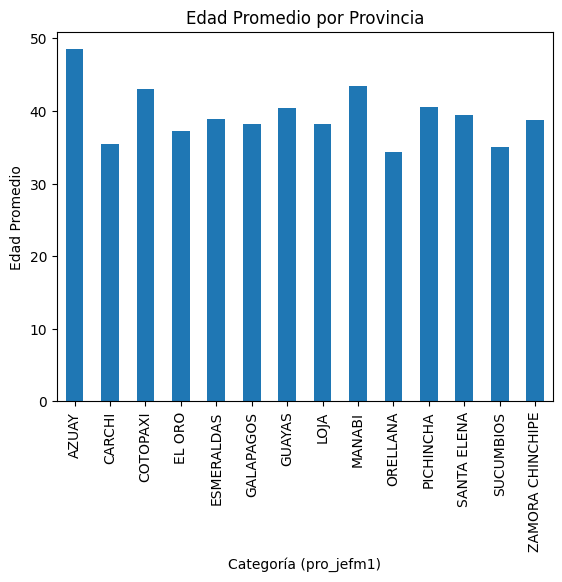

In [21]:
df_grouped = lug_proc.groupby('pro_jefm1')['edad'].mean()
df_grouped.plot(kind='bar')
plt.xlabel('Categoría (pro_jefm1)')
plt.ylabel('Edad Promedio')
plt.title('Edad Promedio por Provincia')
plt.show()

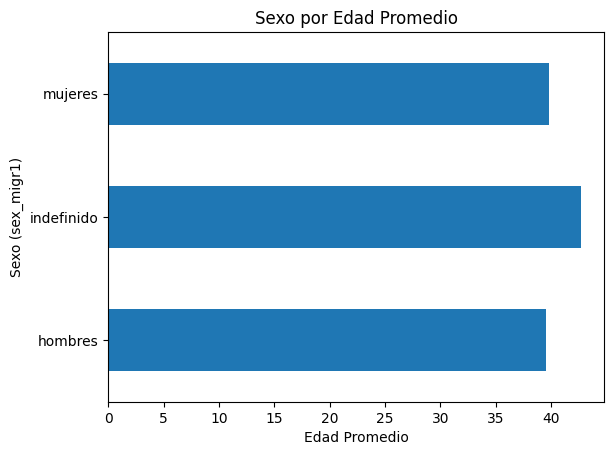

In [22]:
df_grouped1 = lug_proc.groupby('sex_migr1')['edad'].mean()

# Crea el gráfico de barras horizontal
df_grouped1.plot(kind='barh')
plt.xlabel('Edad Promedio')
plt.ylabel('Sexo (sex_migr1)')
plt.title('Sexo por Edad Promedio')
plt.show()

**Tenemos que dado el Meses existe mayor frecuencia de Motivos de Viaje**

**('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')**

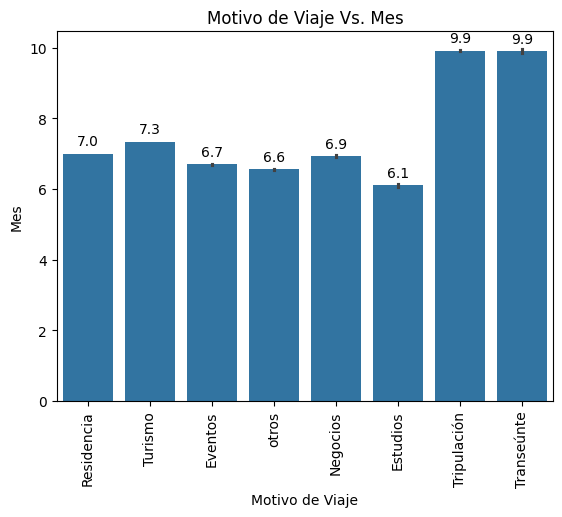

In [23]:
ax = sns.barplot(x='mot_viam1', y='mes_movi', data=lug_proc)

# Agregar las etiquetas de datos sobre cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Agregar etiquetas a los ejes
plt.xlabel('Motivo de Viaje')
plt.ylabel('Mes')

# Rotar las etiquetas del eje x para que aparezcan en formato vertical
plt.xticks(rotation=90)

# Agregar título al gráfico
plt.title('Motivo de Viaje Vs. Mes')

# Mostrar el gráfico
plt.show()

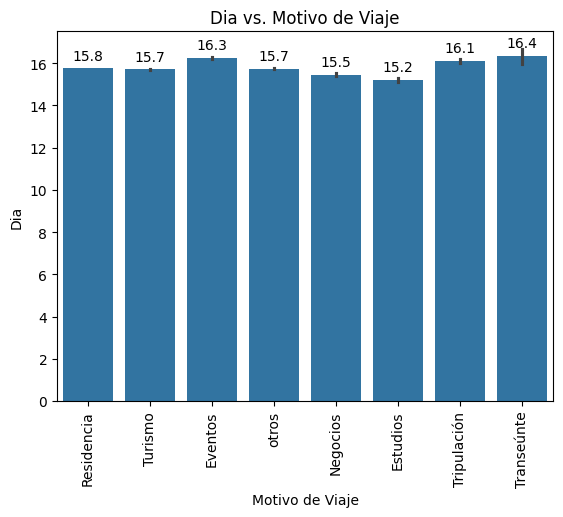

In [24]:
ax = sns.barplot(x='mot_viam1', y='dia_movi', data=lug_proc)

# Agregar las etiquetas de datos sobre cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Agregar etiquetas a los ejes
plt.xlabel('Motivo de Viaje')
plt.ylabel('Dia')

# Rotar las etiquetas del eje x para que aparezcan en formato vertical
plt.xticks(rotation=90)

# Agregar título al gráfico
plt.title('Dia vs. Motivo de Viaje')

# Mostrar el gráfico
plt.show()

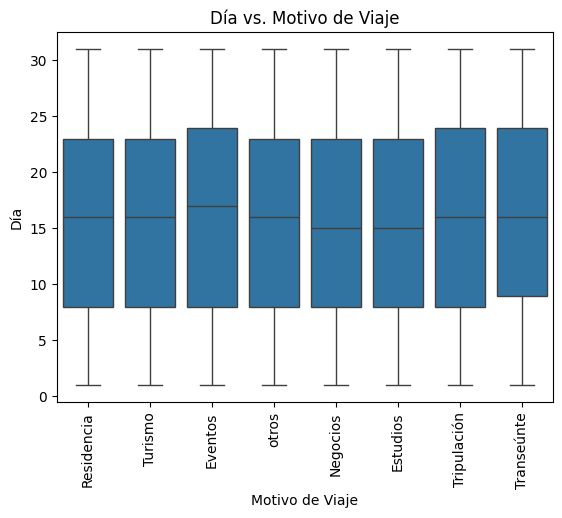

In [25]:
ax = sns.boxplot(x='mot_viam1', y='dia_movi', data=lug_proc)

# Agregar etiquetas a los ejes
plt.xlabel('Motivo de Viaje')
plt.ylabel('Día')

# Rotar las etiquetas del eje x para que aparezcan en formato vertical
plt.xticks(rotation=90)

# Agregar título al gráfico
plt.title('Día vs. Motivo de Viaje')

# Mostrar el gráfico
plt.show()